In [1]:
from tempfile import mkdtemp
import os.path as path

In [2]:
import sys 
sys.path.append('..')
import alpenglow.files as af
import matplotlib.pyplot as plt
%matplotlib inline
import skimage.external.tifffile as tiff
from skimage import transform
import numpy as np
import shutil as sh
import os
import boto3
from scipy import optimize
import alpenglow.stitching
from imp import reload
reload(alpenglow.stitching)
from alpenglow.stitching import stitch, find_shift, apply_shift, stitch_zstack
import alpenglow.stitching as ast

In [3]:

import skimage
from skimage.feature import register_translation
from skimage import img_as_float
from skimage import exposure
from skimage.io import imread_collection, ImageCollection
from skimage.external.tifffile import imread

In [4]:
import time

In [5]:
images_7 = imread_collection("../data/im_000007_0*")
images_8 = imread_collection("../data/im_000008_0*")
images_9 = imread_collection("../data/im_000009_0*")

In [6]:
def collection_to_memmap(collection):
    f = path.join(mkdtemp(), 'images7.dat')
    h = open(f, 'w')
    mm = np.memmap(f, dtype=collection[0].dtype, 
                   shape=(len(collection), 
                          collection[0].shape[0], 
                          collection[0].shape[1]))
    for z in range(mm.shape[0]):
        mm[z] = collection[z]
    
    return mm

In [7]:
t1 = time.time()
mm7 = collection_to_memmap(images_7)
mm8 = collection_to_memmap(images_8)
t2 = time.time()
print(t2-t1)

226.79826021194458


In [8]:
t1 = time.time()
stack_8_mm = ast.stitch_zstack(mm7, mm8)
t2 = time.time()
print(t2-t1)

79.48993349075317


In [10]:
t1 = time.time()
stack_8_col = ast.stitch_zstack(images_7, images_8, current_stack=8)
t2 = time.time()
print(t2-t1)

510.48384308815


In [11]:
226 + 80, 510

(306, 510)

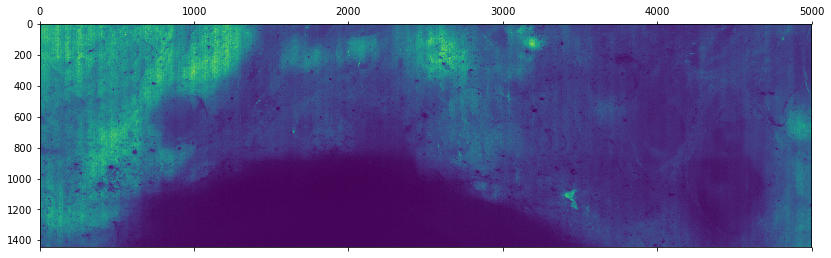

In [22]:
plt.matshow(stack_8_col[1][:, 10000:15000])

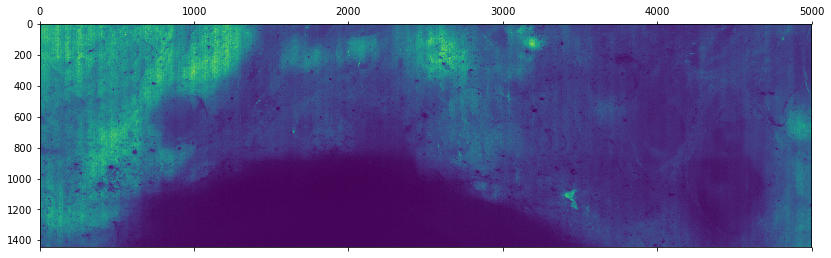

In [23]:
plt.matshow(stack_8_mm[1, :, 10000:15000])

In [24]:
np.all(stack_8_col[1] == stack_8_mm[1])

memmap(True, dtype=bool)